# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

In the previous Codealong, you looked at all the requirements for running an OLS simple regression using Statsmodels. You worked with the height-weight data to understand the process and all the necessary steps that must be performed. In this lab , you'll explore slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics

In [1]:
# Load necessary libraries and import the data
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.set_index("Unnamed: 0")

In [2]:
# Check the columns and first few rows

df.head()

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Get the 5-point statistics for data 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
# Describe the contents of this dataset
# seems to be spending no different advertising pipelines related to the sales outcome

## Step 2: Plot histograms with kde overlay to check the distribution of the predictors

In [5]:
# For all the variables, check distribution by creating a histogram with kde
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3)
sns.distplot(df.TV, ax=axs[0])
sns.distplot(df.radio, ax=axs[1])
sns.distplot(df.newspaper, ax=axs[2])
#sns.distplot(df.TV, ax=axs[3])


/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [6]:
# Record your observations here 
# none of them seem to follow a good distribution


## Step 3: Test for the linearity assumption 

Use scatterplots to plot each predictor against the target variable

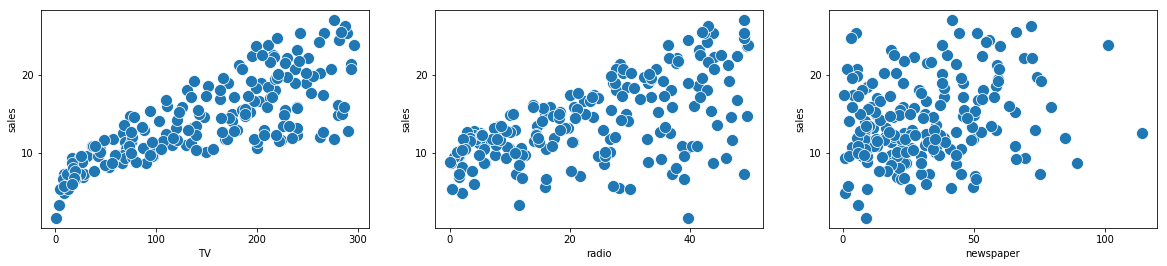

In [7]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(20)
sns.set_context("poster")
sns.scatterplot(x=df.TV,y=df.sales, ax=axs[0])
sns.scatterplot(x=df.radio,y=df.sales, ax=axs[1])
sns.scatterplot(x=df.newspaper,y=df.sales, ax=axs[2])

In [8]:
# Record yor observations on linearity here 
# less linear as it goes on

### Conclusion so far

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We'll move ahead with our analysis using TV and radio, and rule out newspaper because we believe it violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. You'll learn about this later on.

## Step 4: Run a simple regression in Statsmodels with TV as a predictor

In [9]:
# import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
# build the formula 
model = ols(formula="sales~TV",data=df)
# create a fitted model in one line
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.47e-42
Time:                        19:25:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 5: Get Regression Diagnostics Summary

Note here that the coefficients represent associations, not causations

## Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: You can use the `model.predict()` function to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

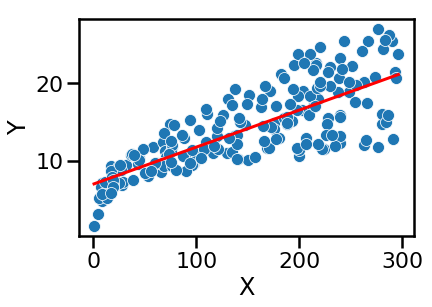

In [23]:
ax = plt.subplot()
sns.scatterplot(x=df.TV,y=df.sales,ax=ax)
sns.lineplot(x=model_df.X,y=model_df.Y,ax=ax,color="Red")

In [12]:
x1 = df.TV.sort_values().iloc[0]
x2 = df.TV.sort_values().iloc[-1]

y1 = model.predict(df.TV.sort_values()).iloc[0]
y2 = model.predict(df.TV.sort_values()).iloc[-1]

21.122453773474746

In [19]:
help(model.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.regression.linear_model.OLSResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array-like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    args, kwargs :
        Some models can take additional arguments or keywords, see the
        predict method of the model for the details.
    
    Returns
    -------
    prediction : ndarray, pandas.Series or pandas.DataFrame
        See s

In [18]:
# create a DataFrame with the minimum and maximum values of TV
model_df = pd.DataFrame(columns=["X","Y"],data=[[x1,y1],[x2,y2]])

# make predictions for those x values and store them
#df.TV.sort_values()

# first, plot the observed data and the least squares line

## Step 7: Visualize the error term for variance and heteroscedasticity

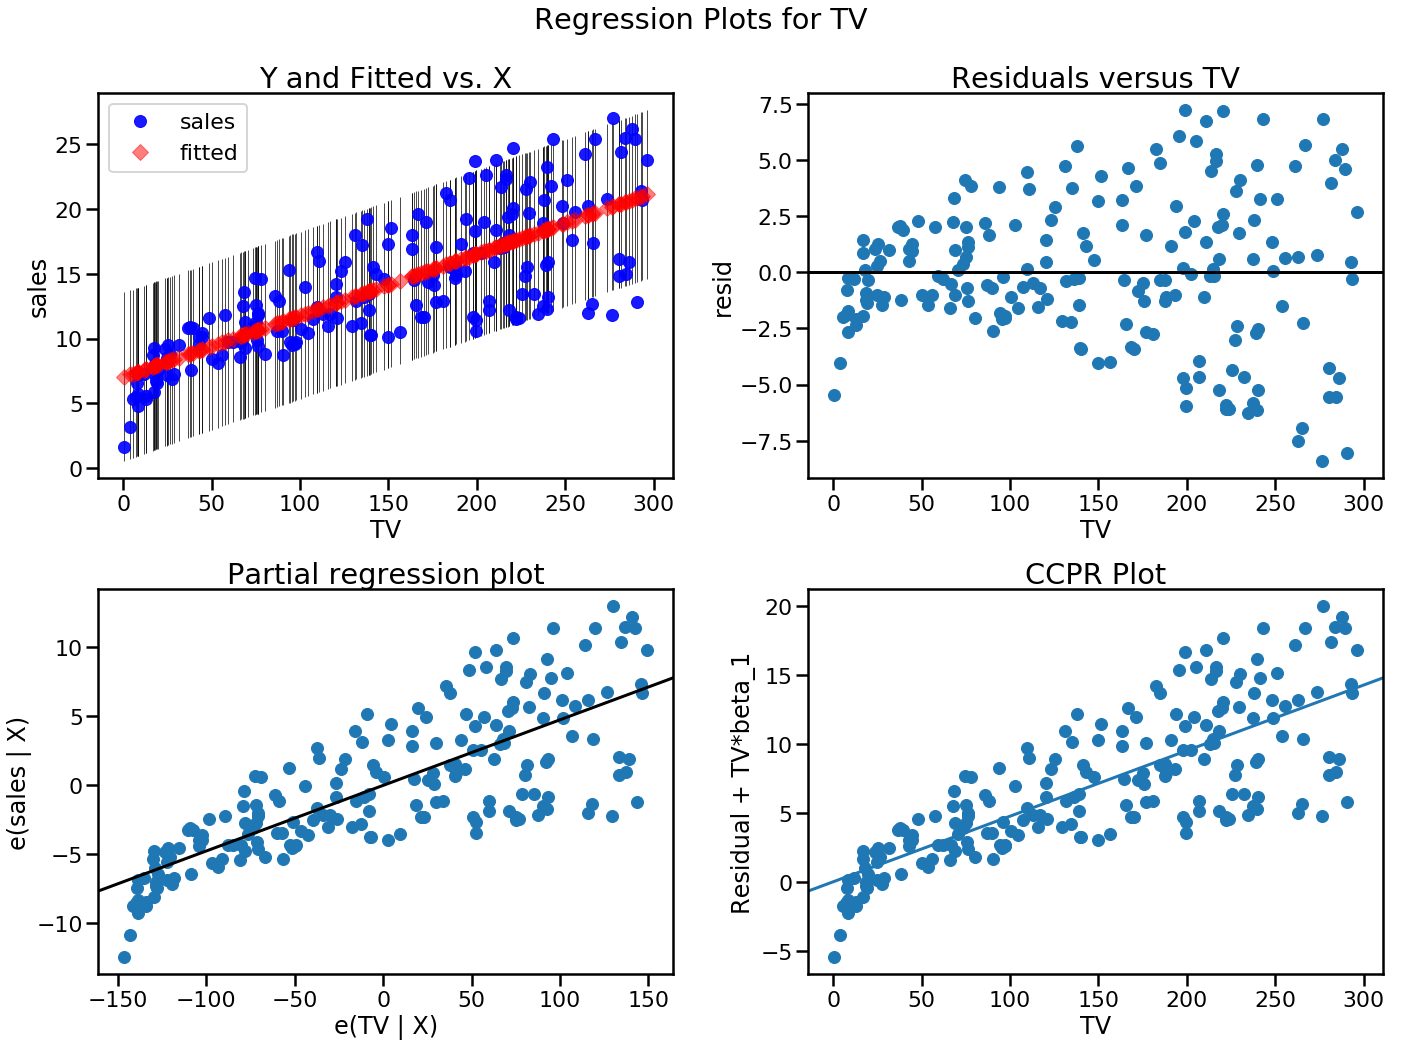

In [29]:
type(model)
fig = plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

In [30]:
# Record Your observations on heteroscedasticity
# Clearly there is a trend towards more varience as TV goes up

## Step 8: Check the normality assumptions by creating a QQ-plot

In [32]:
residuals

Unnamed: 0
1      4.129225
2      1.252026
3      1.449776
4      4.265605
5     -2.727218
6     -0.246162
7      2.034050
8      0.453502
9     -2.641409
10    -5.930414
11    -1.574765
12     0.161290
13     1.036034
14    -1.967416
15     2.265178
16     6.078747
17     2.244422
18     3.990596
19     0.977871
20     0.565259
21     0.585404
22    -5.817792
23    -2.060077
24    -2.385209
25    -0.294126
26    -7.529976
27     1.174421
28    -2.546141
29     0.040290
30     0.111320
         ...   
171   -1.009426
172   -0.352371
173   -0.364312
174   -3.337764
175   -6.104742
176    6.804511
177    1.359305
178   -3.423330
179   -8.385982
180   -2.304661
181   -3.976831
182   -5.219349
183   -1.004153
184    5.495869
185   -1.497393
186    5.822395
187   -3.363955
188    1.183154
189   -4.728073
190   -1.221529
191    1.889709
192   -0.721610
193   -1.950224
194    4.638295
195    3.151171
196   -1.248493
197   -1.810545
198   -2.646579
199    4.986015
200   -4.665848
Length: 200, 

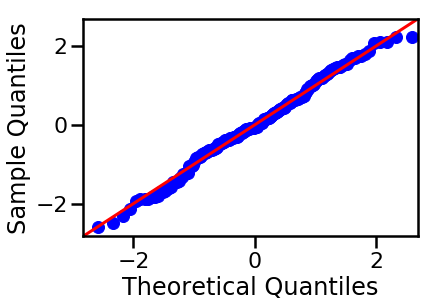

In [31]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [33]:
# Record Your observations on the normality assumption
#The variance distribution is very normal

## Step 9: Repeat the above for radio and record your observations

In [ ]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           4.35e-19
Time:                        20:52:55   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Record your observations here for goodnes of fit 

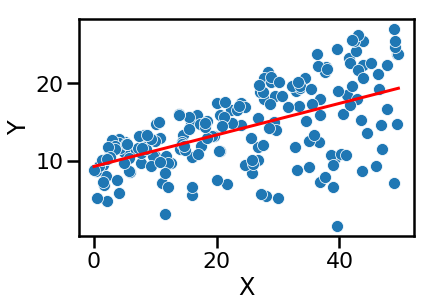

In [39]:
model_radio = ols(formula="sales~radio",data=df)
# create a fitted model in one line
model_radio = model_radio.fit()

x1_r = df.radio.sort_values().iloc[0]
x2_r = df.radio.sort_values().iloc[-1]

y1_r = model_radio.predict(df.radio.sort_values()).iloc[0]
y2_r = model_radio.predict(df.radio.sort_values()).iloc[-1]

model_df_radio = pd.DataFrame(columns=["X","Y"],data=[[x1_r,y1_r],[x2_r,y2_r]])
ax = plt.subplot()
sns.scatterplot(x=df.radio,y=df.sales,ax=ax)
sns.lineplot(x=model_df_radio.X,y=model_df_radio.Y,ax=ax,color="Red")



In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.47e-42
Time:                        20:02:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

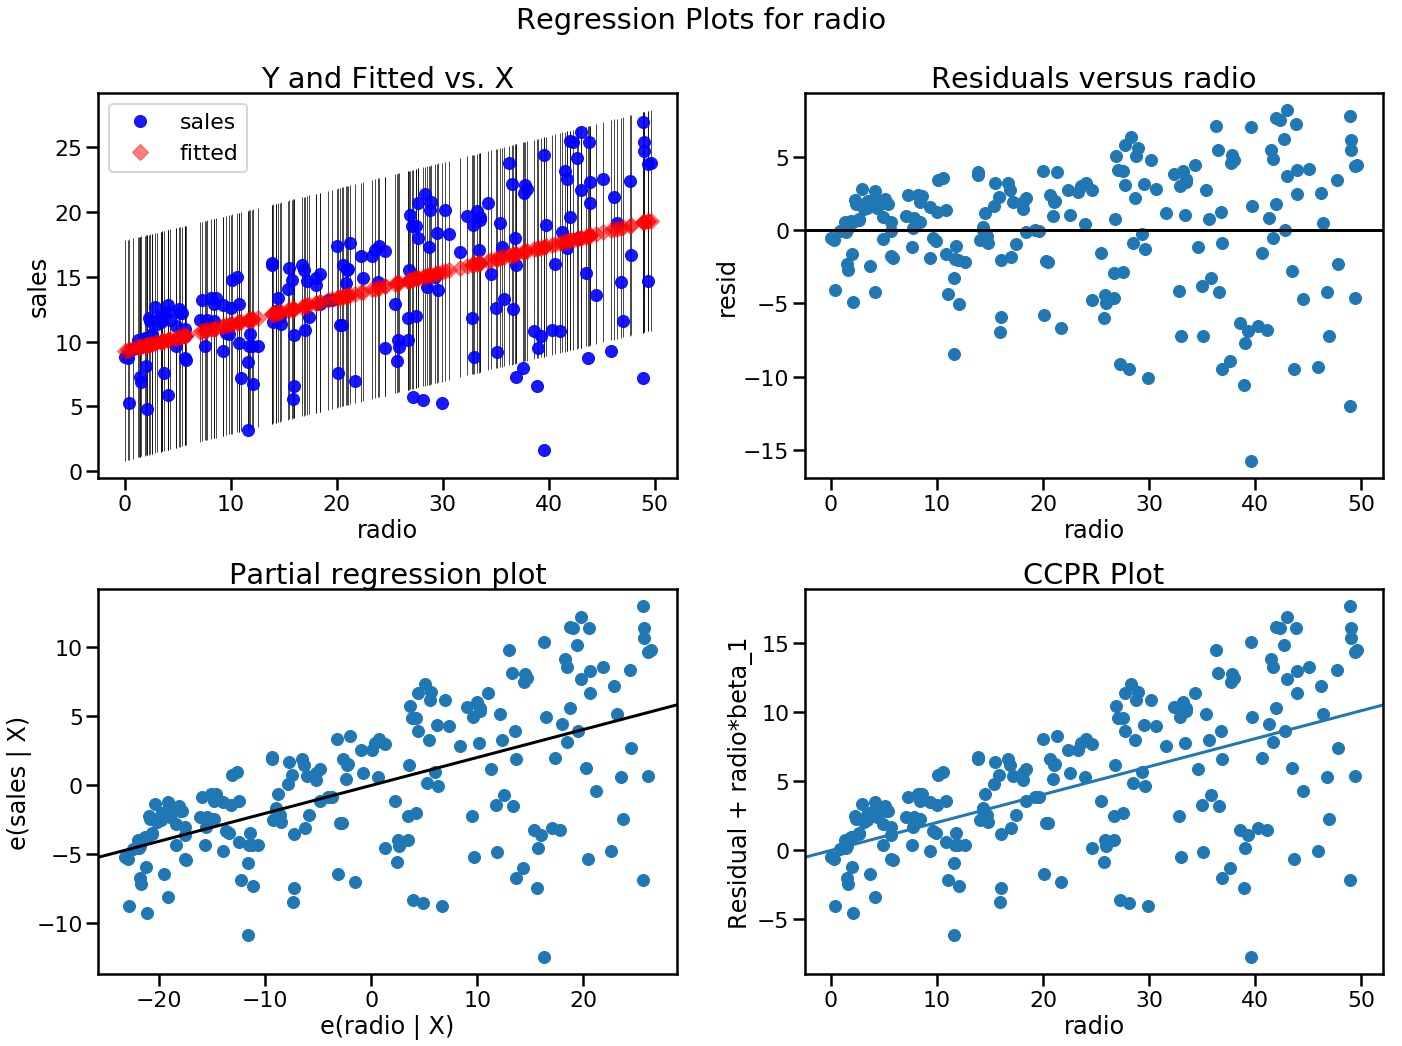

In [41]:
fig = plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model_radio, "radio", fig=fig)
plt.show()

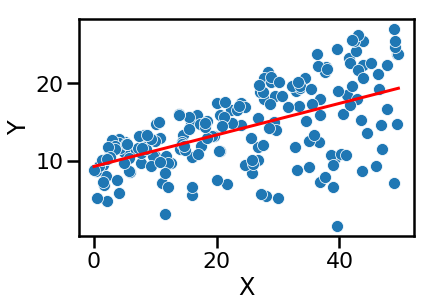

In [42]:
ax = plt.subplot()
sns.scatterplot(x=df.radio,y=df.sales,ax=ax)
sns.lineplot(x=model_df_radio.X,y=model_df_radio.Y,ax=ax,color="Red")

just looking at the graph you can see the varience increases with radio ads.

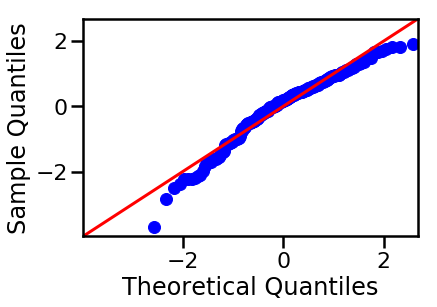

In [43]:
residuals = model_radio.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

varience is skewed negative which indicates that it is not well corralated

## The Answer

Based on above analysis, you can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated the linearity assumption. `TV` and `radio` did not provide a high value for the coefficient of determination, where TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra preprocessing or use more advanced techniques. 

Remember there are lots of technqiues we can employ to fix these data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, you'll look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You looked for the regression assumptions before and after the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 